# chap4 最小二乗法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./slr06.csv')

In [3]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


こちらのデータですが、特徴量（X）が保険金支払い請求件数、ターゲット（y）が請求数に対して実際に支払われた保険金額（単位：1000 スェーデン・クローナ）です。

次は、CSVファイルから読み込んだ特徴量X（保険金請求件数）とターゲットY（保険金支払い総額）の2つのデータを可視化してみましょう。

データの可視化ですが、Pythonのオープンソースライブラリである「matplotlib」を使います。初めて扱うデータセットは、データの特性やパターンなどを把握するために、まずは可視化をするのが一般的です。

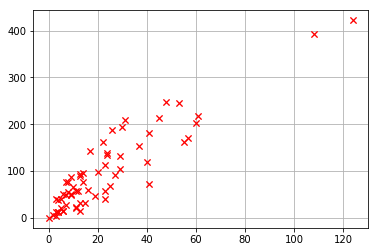

In [5]:
plt.plot(data['X'],data['Y'],'rx')
plt.grid(True)
plt.show()

上の散布図をみても確認できますが、特徴量XとターゲットYは「正の線形関係」にあるのが解ります。これらのデータを最小二乗法を使って、一番フィットする線形モデル（直線）を求めましょう。

最後に、データから特徴量xとターゲットyに切り分けてあげましょう。また、念のため切り分けたxとyのサイズをshape()を使って確認してみます。

In [6]:
#xとyで分ける
x = data['X']
y = data['Y']

#サイズ確認
x.shape,y.shape

((63,), (63,))

両方とも63件のデータをもつPandasのシリーズとして切り分けられたのが確認できます。次は「最小二乗法」を使って、最適なw1（係数-直線の傾き）とw0（定数項-直線のY切片）を求めてみましょう！

セクション3 最小二乗法を使ってみよう
前回のチャプターで最小二乗法の計算式を勉強しましたが、コードに落とし込む前に簡単な復習をしましょう。まずは、線形モデルの式から見てみましょう。

先ほど読み込んだデータの特徴量X（保険金請求件数）とターゲットy（保険金支払い総額）の関係性を最も適切に表す直線（線形モデル）の数式が上記でした。今回のゴールとして、上記の数式のw1（係数）とw0（定数項）を、最小二乗法を使って求めるわけです。

最小二乗法を使ってw1とw0を求める数式として下記の2つの数式を使います。

求める手順として、まずはw1を求めて、その後にw0を求めなくてはいけません。また、w1を求めるには、「xとyの共分散」と「xの分散」を求める必要があります。下記の式を使って、求めることが可能です。


計算式の復習も出来ましたので、次はPythonを使ってw1とw0を計算してみましょう！まずは
¯
x
（xの平均）と
¯
y
（yの平均）を計算しましょう。

In [7]:
#平均
mean_x = np.mean(x)
mean_y = np.mean(y)

print(mean_x)
print(mean_y)

22.904761904761905
98.18730158730159


In [10]:
#データの長さ「n」を計算
n = len(x)
print(n)

63


こちらの自動車保険のデータセットですが、全部で63件のデータが入っていますので、n=63となります。

では、いよいよ「共分散（covariance）」と「分散（variance）」をFor Loopを使って計算してみましょう。まずは、共分散と分散を０として作成します。

In [11]:
#共分散（covariance）と分散（variance）を0として作成
covariance = 0
variance = 0

下記が「xとyの共分散」、「xの分散」さらにw1を計算する処理です。上の数式と見比べながらコードを理解しましょう。

In [12]:
#w1(係数)を求める
for i in range(n):
    covariance += (1/n) * (x[i] - mean_x) * (y[i] - mean_y) #xとyの共分散
    variance += (1/n) * (x[i]-mean_x) ** 2 #xの分散の二乗
w1 = covariance / variance

In [13]:
#定数項（w0)を求める
w0 = mean_y - (w1*mean_x)

In [14]:
print(w0,w1)

19.994485759114852 3.413823560066365


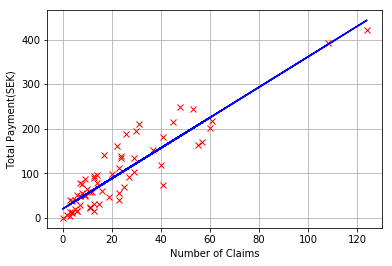

In [15]:
#算出したw1,w0を使ってグラフ描画
plt.plot(data['X'],data['Y'],'rx')
plt.plot(data['X'],data['X'] * w1 + w0, 'b-')
plt.xlabel('Number of Claims')
plt.ylabel('Total Payment(SEK)')
plt.grid(True)
plt.show()

In [16]:
#モデルを使って予測
pred = w1 * 90 + w0
print(pred)

327.23860616508773


In [17]:
#RMSE
rmse = 0
for i in range(n):
    y_pred = w1 * x[i] + w0
    rmse += (y_pred - y[i]) **2
rmse = np.sqrt(rmse/n)
print(rmse)

35.36582996879147


# chap5　最急降下法

前回のチャプターでは、最小二乗法を使って線形モデルを構築しました。今回のチャプターでは、全く同じデータセットを使い、異なる手法「最急降下法（Gradient Descent）」を使って線形モデルを構築してみましょう！

「最小二乗法」でも「最急降下法」でも、使うデータは同じですので、線形モデルは同等または類似した値のモデルの構築ができるはずです。

セクション2 コスト（誤差）を算出する関数
最急降下法で最適なw1（係数）とw0（定数項）を導き出す前に、チャプター3でやった、 「予測値と実際値の誤差」を意味する「コスト」を計算する処理を書きましょう。

最小二乗法では、一回の計算で最適なw1とw0を導き出すことができましたが、最急降下法では学習回数（Iterations）と学習率（Alpha）を設定して、何度も計算をすることで、最適な値（つまり誤差が最小となる地点）を導き出す方法です。

コストを計算する処理を作成しておくことで、後ほど最急降下法を実行する際に、コストがどのように減少していくのかを確認することが可能です。

「最小二乗法」でも「最急降下法」でも、求める線形モデルの数式は当然変わりません。

機械学習の数式で
^
y
（読み方-ワイハット）と出てきた場合、一般的にはモデルと特徴量から予測した「ターゲット」、つまり予測値を表します。また、コストですが、一般的に「J（ジェイ）」と表され、下記の数式で求める事が可能です。


In [18]:
#コスト関数（単回帰分析）
def cost(w0,w1,x,y):
    cost = 0
    for i in range(0,len(x)):
        cost += ((w1 * x[i] + w0) -y[i]) **2
        cost = cost / (len(data)*2)
    return cost

In [19]:
#パラメータ初期値を設定してコストを測定
w0, w1 = 0,0
cost_0 = cost(w0,w1,x,y)
print(cost_0)

282.7911198866909


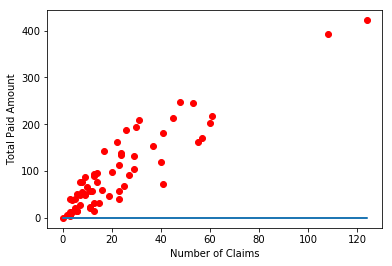

In [20]:
#仮定モデルとデータの確認
plt.scatter(x,y,c='r')
plt.xlabel('Number of Claims')
plt.ylabel('Total Paid Amount')

plt.plot(x,x*w1+w0,'-')
plt.show()

In [21]:
#必要なハイパーパラメーターの設定
alpha = 0.001
init_w0 = 0
init_w1 = 0
iterations = 10000

In [22]:
#最急降下法
def gradientDescent(w0_in,w1_in,x,y,alpha):
    w0_gradient = 0
    w1_gradient = 0
    m = len(x)
    for i in range(0,len(x)):
        w0_gradient += (1/m)*(((w1_in*x[i])+w0_in)-y[i])
        w1_gradient += (1/m)*((((w1_in*x[i])+w0_in)-y[i])*x[i])
    w0_out = w0_in - (alpha * w0_gradient)
    w1_out = w1_in - (alpha * w1_gradient)
    return[w0_out,w1_out]

In [23]:
#最急降下法とコスト処理を行います
def run(x,y,init_w0,init_w1,alpha,iterations):
    w0 = init_w0
    w1 = init_w1
    J_hist = np.zeros((iterations,1))
    for i in range(iterations):
        w0,w1 = gradientDescent(w0,w1,x,y,alpha)
        J_hist[i] = cost(w0,w1,x,y)
    return [w0,w1], J_hist

In [24]:
#最急降下法の実施
[w0,w1],J_hist = run(x,y,init_w0,init_w1,alpha,iterations)

In [25]:
print(w0,w1)

19.867578603427145 3.4165637865140375


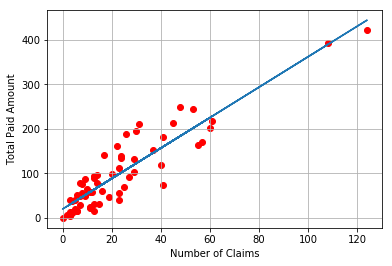

In [26]:
#初期パラメータでのモデルとデータのプロット確認
plt.scatter(x,y,c='r')
plt.xlabel('Number of Claims')
plt.ylabel('Total Paid Amount')

plt.plot(x,x*w1+w0,'-')
plt.draw()
plt.grid(True)
plt.show()

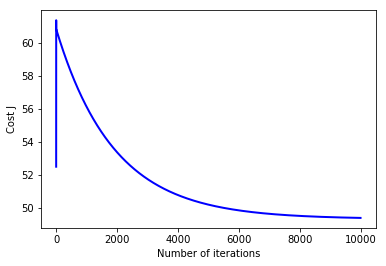

In [27]:
#コストの確認
plt.plot(range(J_hist.size),J_hist,"-b",linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [28]:
#最急降下法の線形モデルのRMSE
rmse = 0
for i in range(m):
    y_pred = w1* x[i] + w0
    rmse += (y_pred - y[i]) **2
rmse = np.sqrt(rmse/m)
print(rmse)

NameError: name 'm' is not defined